In [23]:
# Import libaries and dependencies #
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import os

import warnings
warnings.filterwarnings("ignore")

In [24]:
# Import data & convert to dataframe
batting_data_load = "../Project_01/CHC_batting.csv"
batting_data = pd.read_csv(batting_data_load)
batting_data.head()

,Rank,Year,Position,Name,Age,Games,Plate_Appearances,At_Bats,Runs,Hits,...,On_Base_Plus_Slugging_Percentage,On_Base_Plus_Slugging_Percentage_Plus,Total_Bases,Double_Plays_Grounded_Into,Times_Hit_By_Pitch,Sacrifice_Hits,Sacrifice_Flies,Intentional_Bases_on_Balls,Dominant_Hand,Switch_Hitter
0,1,2023,C,Yan Gomes,35,116,419,382,44,102,...,0.723,93,156,9,9,0,7,1,Right,No
1,2,2023,1B,Trey Mancini,31,79,263,235,31,55,...,0.635,71,79,5,2,0,3,1,Right,No
2,3,2023,2B,Nico Hoerner,26,150,688,619,98,175,...,0.729,97,237,12,14,1,5,0,Right,No
3,4,2023,SS,Dansby Swanson,29,147,638,565,81,138,...,0.744,99,235,9,5,0,2,0,Right,No
4,5,2023,3B,Nick Madrigal,26,92,294,270,34,71,...,0.663,79,95,3,9,5,0,0,Right,No


In [25]:
# Import data & convert to dataframe
pitching_data_load = "../Project_01/CHC_pitching.csv"
pitching_data = pd.read_csv(pitching_data_load)
pitching_data.head()

,Rank,Year,Position,Name,Age,Wins,Losses,Winning_Percentage,Earned_Run_Average,Games_Played,...,Adjusted_Earned_Run_Average,Fielding_Independent_Pitching,Walks_Hits_Per_Inning_Pitched,Hits_Per_Nine_Innings,Home_Runs_Per_Nine_Innings,Walks_Per_Nine_Innings,Strikeouts_Per_Nine_Innings,Strikeout_Walk_Ratio,Dominant_Hand,Switch_Hitter
0,1,2023,SP,Justin Steele,27,16,5,0.762,3.06,30,...,146,3.02,1.171,8.7,0.7,1.9,9.1,4.89,Left,No
1,3,2023,SP,Drew Smyly,34,11,11,0.500,5.00,41,...,90,4.96,1.426,9.3,1.6,3.5,8.9,2.52,Left,No
2,5,2023,SP,Marcus Stroman,32,10,9,0.526,3.95,27,...,113,3.58,1.259,7.9,0.6,3.4,7.8,2.29,Right,No
3,2,2023,SP,Jameson Taillon,31,8,10,0.444,4.84,30,...,93,4.61,1.276,9.1,1.6,2.4,8.2,3.41,Right,No
4,4,2023,SP,Kyle Hendricks,33,6,8,0.429,3.74,24,...,120,3.81,1.204,9.1,0.9,1.8,6.1,3.44,Right,No


In [26]:
pitching_data.head()

,Rank,Year,Position,Name,Age,Wins,Losses,Winning_Percentage,Earned_Run_Average,Games_Played,...,Adjusted_Earned_Run_Average,Fielding_Independent_Pitching,Walks_Hits_Per_Inning_Pitched,Hits_Per_Nine_Innings,Home_Runs_Per_Nine_Innings,Walks_Per_Nine_Innings,Strikeouts_Per_Nine_Innings,Strikeout_Walk_Ratio,Dominant_Hand,Switch_Hitter
0,1,2023,SP,Justin Steele,27,16,5,0.762,3.06,30,...,146,3.02,1.171,8.7,0.7,1.9,9.1,4.89,Left,No
1,3,2023,SP,Drew Smyly,34,11,11,0.500,5.00,41,...,90,4.96,1.426,9.3,1.6,3.5,8.9,2.52,Left,No
2,5,2023,SP,Marcus Stroman,32,10,9,0.526,3.95,27,...,113,3.58,1.259,7.9,0.6,3.4,7.8,2.29,Right,No
3,2,2023,SP,Jameson Taillon,31,8,10,0.444,4.84,30,...,93,4.61,1.276,9.1,1.6,2.4,8.2,3.41,Right,No
4,4,2023,SP,Kyle Hendricks,33,6,8,0.429,3.74,24,...,120,3.81,1.204,9.1,0.9,1.8,6.1,3.44,Right,No


In [27]:
filtered_pitchers=pitching_data[pitching_data['Innings_Pitched']>= 100]
filtered_pitchers.to_csv('filtered_pitchers.csv')

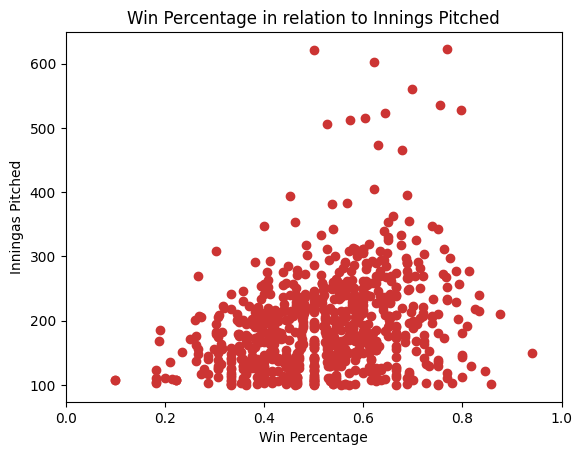

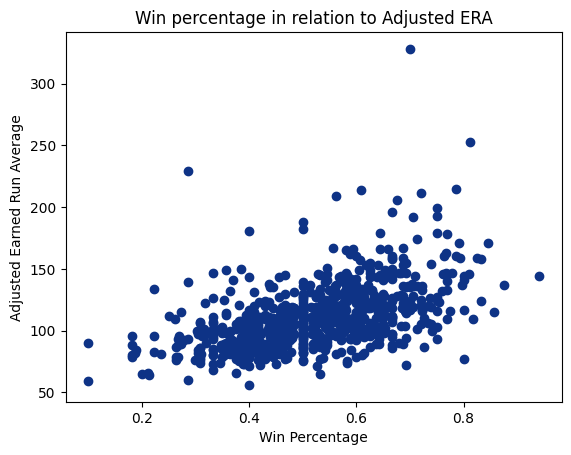

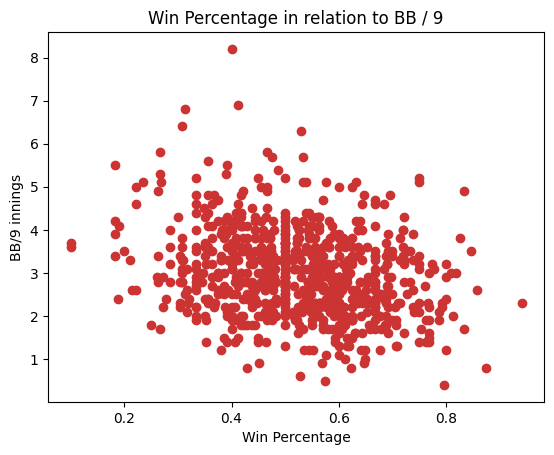

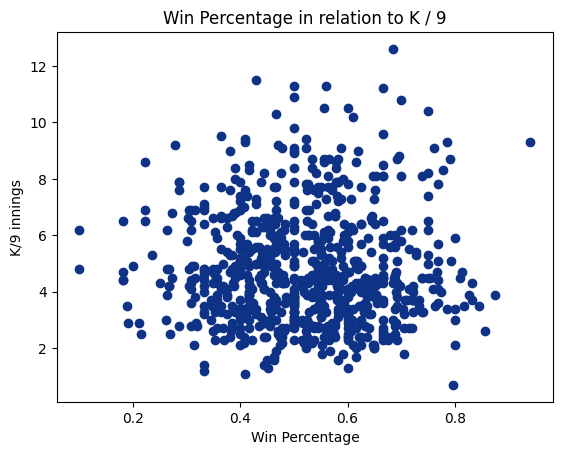

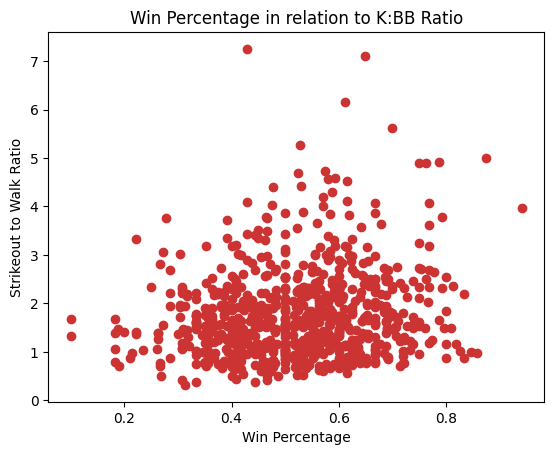

In [28]:
# unfiltered
# Compare Innings Pitched to win percentage
plt.scatter(filtered_pitchers["Winning_Percentage"], filtered_pitchers["Innings_Pitched"], color="#CC3433")
plt.title("Win Percentage in relation to Innings Pitched")
plt.xlabel("Win Percentage")
plt.ylabel ("Inningas Pitched")
plt.xlim (0,1)
plt.savefig("filteredimages/ipfiltered.jpg")
plt.show()
# Compare Adjusted ERA to win percentage
plt.scatter(filtered_pitchers["Winning_Percentage"], filtered_pitchers["Adjusted_Earned_Run_Average"], color = "#0E3386")
plt.title("Win percentage in relation to Adjusted ERA")
plt.xlabel("Win Percentage")
plt.ylabel("Adjusted Earned Run Average")
plt.savefig("filteredimages/aERA.jpg")
plt.show()
# Compare Walks per 9 innings to win percentage
plt.scatter(filtered_pitchers["Winning_Percentage"], filtered_pitchers["Walks_Per_Nine_Innings"], color="#CC3433")
plt.title("Win Percentage in relation to BB / 9")
plt.xlabel("Win Percentage")
plt.ylabel ("BB/9 innings")
plt.savefig("filteredimages/wp9.jpg")
plt.show()
# Compare Strikeoutes per 9 innings to win percentage
plt.scatter(filtered_pitchers["Winning_Percentage"], filtered_pitchers["Strikeouts_Per_Nine_Innings"], color = "#0E3386")
plt.title("Win Percentage in relation to K / 9")
plt.xlabel("Win Percentage")
plt.ylabel ("K/9 innings")
plt.savefig("filteredimages/k9.jpg")
plt.show()
# Compare  Strikeout to Walk ration to win percentage
plt.scatter(filtered_pitchers["Winning_Percentage"], filtered_pitchers["Strikeout_Walk_Ratio"], color="#CC3433")
plt.title("Win Percentage in relation to K:BB Ratio")
plt.xlabel("Win Percentage")
plt.ylabel ("Strikeout to Walk Ratio")
plt.savefig("filteredimages/ktwr.jpg")
plt.show()

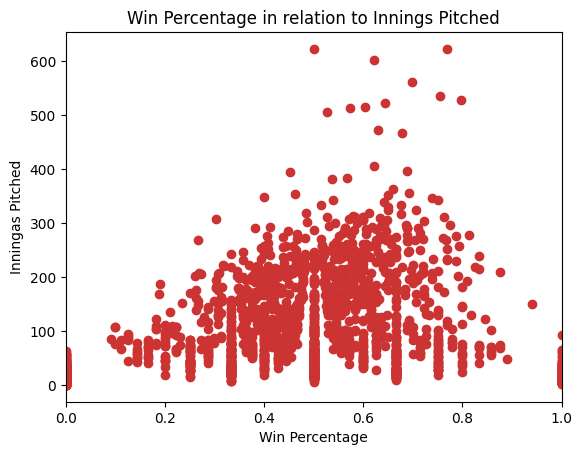

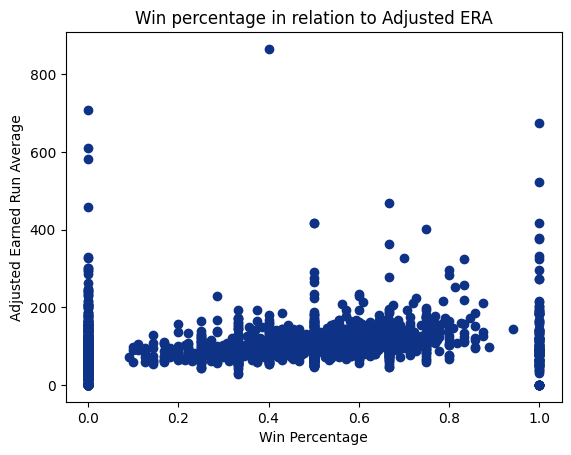

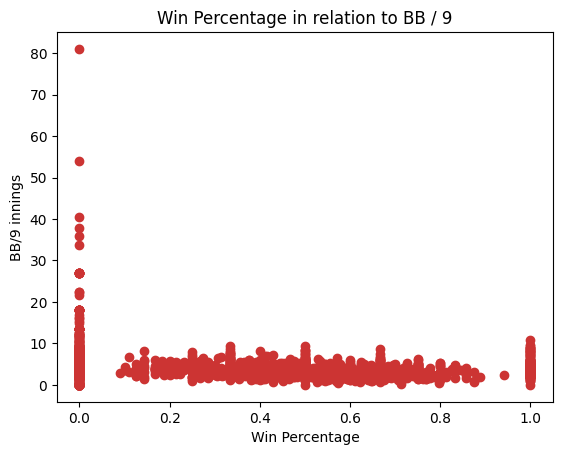

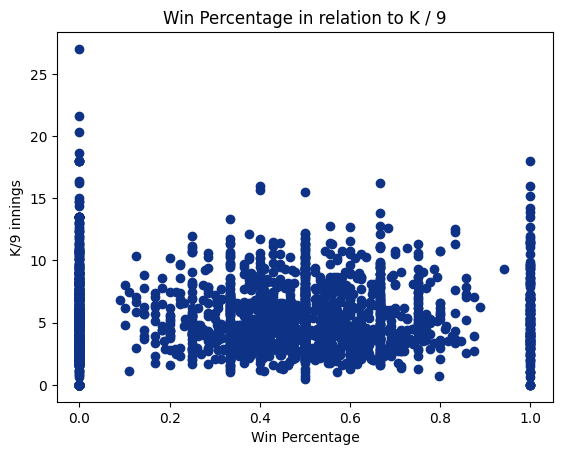

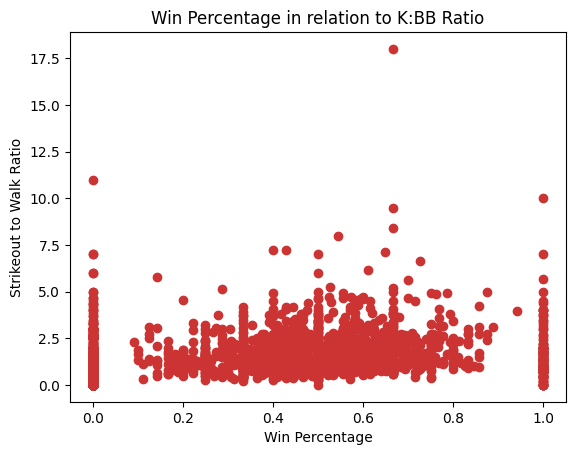

In [29]:
# Does a pitcher's overall performance impact game losses and wins?

# filtered
# Compare Innings Pitched to win percentage
plt.scatter(pitching_data["Winning_Percentage"], pitching_data["Innings_Pitched"], color="#CC3433")
plt.title("Win Percentage in relation to Innings Pitched")
plt.xlabel("Win Percentage")
plt.ylabel ("Inningas Pitched")
plt.xlim (0,1)
plt.savefig("unfilteredimages/ipunfiltered.jpg")
plt.show()
# Compare Adjusted ERA to win percentage
plt.scatter(pitching_data["Winning_Percentage"], pitching_data["Adjusted_Earned_Run_Average"], color = "#0E3386")
plt.title("Win percentage in relation to Adjusted ERA")
plt.xlabel("Win Percentage")
plt.ylabel("Adjusted Earned Run Average")
plt.savefig("unfilteredimages/aERAunfiltered.jpg")
plt.show()
# Compare Walks per 9 innings to win percentage
plt.scatter(pitching_data["Winning_Percentage"], pitching_data["Walks_Per_Nine_Innings"], color="#CC3433")
plt.title("Win Percentage in relation to BB / 9")
plt.xlabel("Win Percentage")
plt.ylabel ("BB/9 innings")
plt.savefig("unfilteredimages/wp9unfiltered.jpg")
plt.show()
# Compare Strikeoutes per 9 innings to win percentage
plt.scatter(pitching_data["Winning_Percentage"], pitching_data["Strikeouts_Per_Nine_Innings"], color = "#0E3386")
plt.title("Win Percentage in relation to K / 9")
plt.xlabel("Win Percentage")
plt.ylabel ("K/9 innings")
plt.savefig("unfilteredimages/k9unfiltered.jpg")
plt.show()
# Compare  Strikeout to Walk ration to win percentage
plt.scatter(pitching_data["Winning_Percentage"], pitching_data["Strikeout_Walk_Ratio"], color="#CC3433")
plt.title("Win Percentage in relation to K:BB Ratio")
plt.xlabel("Win Percentage")
plt.ylabel ("Strikeout to Walk Ratio")
plt.savefig("unfilteredimages/ktwrunfiltered.jpg")
plt.show()